## Importing Libraries

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn.tree import DecisionTreeRegressor, export_graphviz
from sklearn.model_selection import train_test_split,GridSearchCV
from sklearn import metrics, tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import StandardScaler
from sklearn import preprocessing
from sklearn.metrics import accuracy_score, confusion_matrix, roc_curve, roc_auc_score
from IPython.display import Image
import pydotplus
from sklearn.neural_network import MLPRegressor

### Imprting Data from CSV

In [2]:
housing_data = pd.read_csv('C:/Users/kalam/OneDrive - Adobe/Personal/Data Sceince/dataset for students.csv')
housing_data.describe()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
count,18565.000000,18565.000000,18565.000000,18565.000000,18376.000000,18565.000000,18565.000000,18565.000000,18565.000000
mean,-119.570116,35.633888,28.615890,2634.033827,537.711199,1426.223108,499.450902,3.867012,206617.794991
std,2.002922,2.137014,12.564224,2195.915548,424.125849,1142.570832,384.553175,1.895988,115447.104881
min,-124.350000,32.540000,1.000000,2.000000,2.000000,3.000000,2.000000,0.499900,14999.000000
25%,-121.800000,33.930000,18.000000,1442.000000,295.000000,786.000000,279.000000,2.561200,119300.000000
50%,-118.500000,34.260000,29.000000,2123.000000,434.000000,1166.000000,408.000000,3.534100,179400.000000
75%,-118.010000,37.710000,37.000000,3141.000000,646.000000,1725.000000,603.000000,4.741100,264400.000000
max,-114.310000,41.950000,52.000000,39320.000000,6445.000000,35682.000000,6082.000000,15.000100,500001.000000


### Correlation

In [3]:
housing_data.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924545,-0.107575,0.043183,0.067712,0.097420,0.053778,-0.013332,-0.045035
latitude,-0.924545,1.000000,0.011147,-0.035373,-0.065896,-0.106982,-0.070205,-0.081693,-0.145263
housing_median_age,-0.107575,0.011147,1.000000,-0.359676,-0.320041,-0.294054,-0.302620,-0.121457,0.103826
total_rooms,0.043183,-0.035373,-0.359676,1.000000,0.930809,0.855342,0.918620,0.200269,0.134641
total_bedrooms,0.067712,-0.065896,-0.320041,0.930809,1.000000,0.876034,0.979671,-0.003778,0.050108
population,0.097420,-0.106982,-0.294054,0.855342,0.876034,1.000000,0.905547,0.007324,-0.023836
households,0.053778,-0.070205,-0.302620,0.918620,0.979671,0.905547,1.000000,0.016365,0.066069
median_income,-0.013332,-0.081693,-0.121457,0.200269,-0.003778,0.007324,0.016365,1.000000,0.688783
median_house_value,-0.045035,-0.145263,0.103826,0.134641,0.050108,-0.023836,0.066069,0.688783,1.000000


### Plotting Scatter Graph

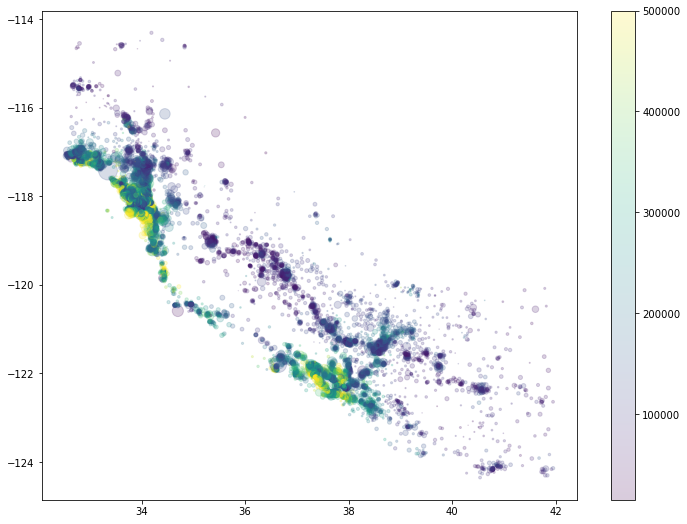

In [4]:
plt.figure(figsize = (12, 9))
plt.scatter(housing_data.latitude, housing_data.longitude, alpha = 0.2, c = housing_data.median_house_value, s = housing_data.population/100)
plt.colorbar()

## Preparing Data

1. Added dummy columns for ocean_proximity column
2. Removed latitude and longitude columns.
3. Filled empty values in total_bedrooms with median value.

In [5]:
housing_data_prepared = pd.get_dummies(housing_data, columns = ['ocean_proximity'])
housing_data_prepared = housing_data_prepared.drop(columns =['ocean_proximity_ISLAND'])
housing_data_prepared['total_bedrooms'].fillna(housing_data_prepared.total_bedrooms.median(), inplace = True)

housing_data_prepared.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18565 entries, 0 to 18564
Data columns (total 13 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   longitude                   18565 non-null  float64
 1   latitude                    18565 non-null  float64
 2   housing_median_age          18565 non-null  int64  
 3   total_rooms                 18565 non-null  int64  
 4   total_bedrooms              18565 non-null  float64
 5   population                  18565 non-null  int64  
 6   households                  18565 non-null  int64  
 7   median_income               18565 non-null  float64
 8   median_house_value          18565 non-null  int64  
 9   ocean_proximity_<1H OCEAN   18565 non-null  uint8  
 10  ocean_proximity_INLAND      18565 non-null  uint8  
 11  ocean_proximity_NEAR BAY    18565 non-null  uint8  
 12  ocean_proximity_NEAR OCEAN  18565 non-null  uint8  
dtypes: float64(4), int64(5), uint8(

### Scaling and Splitting Data

In [7]:
from sklearn.preprocessing import LabelEncoder

X = housing_data_prepared.drop(['median_house_value'], axis=1)
X = preprocessing.scale(X)
Y = housing_data_prepared['median_house_value']

# ensure all data are floating point values
X = X.astype('float32')
# encode strings to integer
Y = LabelEncoder().fit_transform(Y)

# Splitting Data with 8:2 split
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=1)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(14852, 12) (3713, 12) (14852,) (3713,)


In [24]:
def plot_validation_curve(scores,param_range,param_name,scoring='r2'):
    """This function plots validation curve.
    
    Parameters:
        scores: scores obtained from validation_curve() method
        param_range: list of range of parameters passed as 'param_range' in validation_curve() method
        scoring: str
    """
    n=len(param_range)
    
    if scoring=='r2':
        train_score=[scores[0][i].mean() for i in range (0,n)]
        test_score=[scores[1][i].mean() for i in range (0,n)]
    elif scoring=='neg_mean_squared_error':
        train_score=[np.sqrt(-scores[0][i].mean()) for i in range (0,n)]
        test_score=[np.sqrt(-scores[1][i].mean()) for i in range (0,n)]
    
    fig=plt.figure(figsize=(8,6))
    plt.plot(param_range,train_score,label='Train')
    plt.plot(param_range,test_score,label='Test')
    plt.xticks=param_range
    plt.title("Validation curve of {}".format(param_name),size=12)
    plt.legend()

## Linear Regression

In [31]:
from sklearn.linear_model import LinearRegression,Ridge
from sklearn.metrics import mean_squared_error,r2_score
from sklearn.model_selection import learning_curve,cross_val_score,validation_curve,train_test_split
from sklearn.model_selection import GridSearchCV

lr=LinearRegression()
scores=cross_val_score(lr,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())
scores=cross_val_score(lr,X,Y,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

R2:  0.8038181603653033
RMSE:  639.2483383022351


## Ridge Regression

In [35]:
ridge=Ridge(alpha=0.1,random_state=42)
scores=cross_val_score(ridge,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())
scores=cross_val_score(lr,X_train,y_train,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

R2:  0.8038185125775309
RMSE:  597.9386202822516


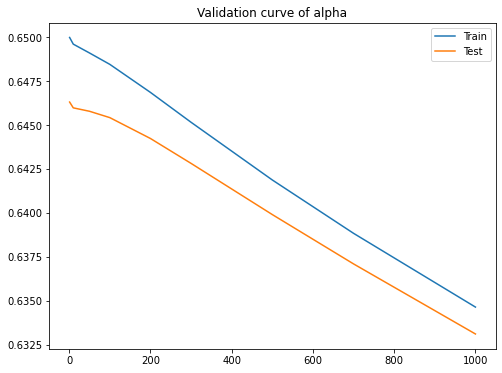

In [36]:
ridge=Ridge(random_state=42)
param_name='alpha'
param_range = [1,10,50,100,200,300,500,700,1000]
#param_range=[1,10,100,800,900,1000,1200,1400,1600,1800,2000]
scoring='r2'
#scoring='neg_mean_squared_error'
curve=validation_curve(ridge,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

n=len(param_range)
'''
if scoring=='r2':
    train_score=[curve[0][i].mean() for i in range (0,n)]
    test_score=[curve[1][i].mean() for i in range (0,n)]
elif scoring=='neg_mean_squared_error':
    train_score=[np.sqrt(-curve[0][i].mean()) for i in range (0,n)]
    test_score=[np.sqrt(-curve[1][i].mean()) for i in range (0,n)]
'''

plot_validation_curve(curve,param_range,param_name,scoring)

## Decision Trees

In [39]:
from sklearn.tree import DecisionTreeRegressor

dtr=DecisionTreeRegressor(random_state=42)
scores=cross_val_score(dtr,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())
scores=cross_val_score(dtr,X,Y,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

R2:  0.8051693755047772
RMSE:  826.1474544045234


### Max Depth

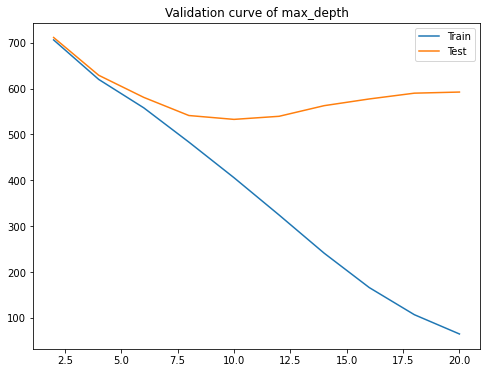

In [41]:
dtr=DecisionTreeRegressor(random_state=42)
param_name='max_depth'
param_range = range(2,21,2)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)

plot_validation_curve(curve,param_range,param_name,scoring)

### Max Features

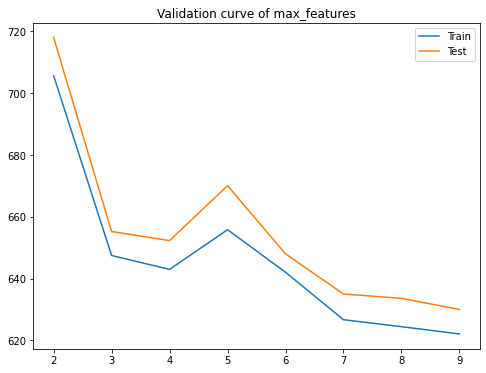

In [42]:
dtr=DecisionTreeRegressor(max_depth=4,random_state=42)
param_name='max_features'
param_range = range(2,10)
scoring='neg_mean_squared_error'
curve=validation_curve(dtr,X_train,y_train,scoring=scoring,cv=5,param_name=param_name,
    param_range=param_range,n_jobs=-1)
plot_validation_curve(curve,param_range,param_name,scoring)

## Gradient Boost

In [45]:
from sklearn.ensemble import GradientBoostingRegressor

gbr=GradientBoostingRegressor(max_depth = 5, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
scores=cross_val_score(gbr,X_train,y_train,n_jobs=-1,cv=5,scoring='r2')
print('R2: ',np.sqrt(scores).mean())
scores=cross_val_score(dtr,X,Y,n_jobs=-1,cv=5,scoring='neg_mean_squared_error')
print('RMSE: ',np.sqrt(-scores).mean())

R2:  0.8987318442979786
RMSE:  682.5700865201667


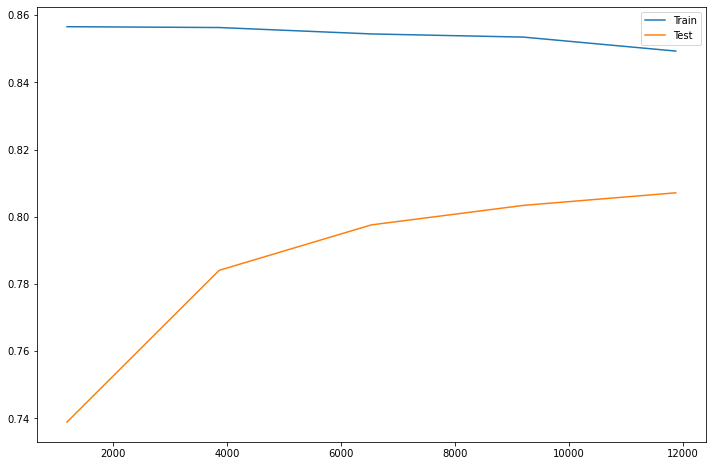

In [46]:
gbr=GradientBoostingRegressor(max_depth= 5, max_features=6, min_samples_split=200, n_estimators=100,random_state=42)
lc=learning_curve(gbr,X_train,y_train,cv=5,n_jobs=-1)
size=lc[0]
train_score=[lc[1][i].mean() for i in range (0,5)]
test_score=[lc[2][i].mean() for i in range (0,5)]
fig=plt.figure(figsize=(12,8))
plt.plot(size,train_score,label='Train')
plt.plot(size,test_score,label="Test")
plt.legend()

## Random Forest

In [47]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from math import sqrt 

model = RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=32,
           max_features='auto', max_leaf_nodes=None,
           min_impurity_decrease=0.0, min_impurity_split=None,
           min_samples_leaf=1, min_samples_split=2,
           min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
           oob_score=False, random_state=None, verbose=1, warm_start=False)

model.fit(X_train,y_train)
#Predictions are done on input test and train
y_predtest = model.predict(X_test)
y_predtrain = model.predict(X_train)

print('\nR2 value_train:',r2_score(y_train,y_predtrain))
print('\nR2 value_test:',r2_score(y_test,y_predtest))
print('Train: root mean squared error:', sqrt(mean_squared_error(y_train,y_predtrain)))
print('Test: root mean squared error:', sqrt(mean_squared_error(y_test,y_predtest)))

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.



R2 value_train: 0.9658262334112847

R2 value_test: 0.8162504298035654
Train: root mean squared error: 186.14696271906064
Test: root mean squared error: 434.7111372479384


[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.5s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished
[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done  10 out of  10 | elapsed:    0.0s finished


## Neural Network using Keras

In [48]:
#Import some crucial tools from tensorflow library
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import datasets, layers, models
from tensorflow.keras.layers import Dropout,Dense
from tensorflow.keras import Sequential

In [49]:
#A custom metric r_square is defined
def r_square(y_test, y_predtest):
    from keras import backend as K
    SS_res =  K.sum(K.square(y_test - y_predtest)) 
    SS_tot = K.sum(K.square(y_test - K.mean(y_test))) 
    return (1 - (SS_res)/(SS_tot))

In [54]:
#Architcture of NN with dropout layer
def create_model():
    model = Sequential()
    model.add(Dense(400, input_dim=12, activation='relu'))
    model.add(Dropout(0.40))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.40))
    model.add(Dense(400, activation='relu'))
    model.add(Dropout(0.40))
    model.add(Dense(300, activation='linear'))
    model.add(Dropout(0.40))
    model.add(Dense(1, 'linear'))
    # Compile model
    sgd = keras.optimizers.SGD(learning_rate=0.001)
    model.compile(loss = tf.keras.losses.MeanSquaredError(), optimizer=sgd, metrics = (r_square))
    return model
#Model is called here
model=create_model()

In [55]:
model = model.fit(X_train, # Features
                      y_train, # Target vector
                      epochs = 10,
                      verbose = 1,
                      validation_split = 0.2) # Data for evaluation

Epoch 1/10
372/372 [==============================] - 2s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 2/10
372/372 [==============================] - 1s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 3/10
372/372 [==============================] - 1s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 4/10
372/372 [==============================] - 1s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 5/10
372/372 [==============================] - 1s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 6/10
372/372 [==============================] - 1s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 7/10
372/372 [==============================] - 2s 4ms/step - loss: nan - r_square: nan - val_loss: nan - val_r_square: nan
Epoch 8/10
372/372 [==============================] - 2s 6ms/step - loss: nan - r_square: 